In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA/web-Google.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'web-Google.txt'],
 ['#', 'Webgraph', 'from', 'the', 'Google', 'programming', 'contest,', '2002'],
 ['#', 'Nodes:', '875713', 'Edges:', '5105039'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '11342'],
 ['0', '824020'],
 ['0', '867923'],
 ['0', '891835'],
 ['11342', '0'],
 ['11342', '27469'],
 ['11342', '38716'],
 ['11342', '309564'],
 ['11342', '322178'],
 ['11342', '387543'],
 ['11342', '427436'],
 ['11342', '538214'],
 ['11342', '638706'],
 ['11342', '645018'],
 ['11342', '835220'],
 ['11342', '856657'],
 ['11342', '867923'],
 ['11342', '891835'],
 ['824020', '0'],
 ['824020', '91807'],
 ['824020', '322178'],
 ['824020', '387543'],
 ['824020', '417728'],
 ['824020', '438493'],
 ['824020', '500627'],
 ['824020', '535748'],
 ['824020', '695578'],
 ['824020', '867923'],
 ['824020', '891835'],
 ['867923', '0'],
 ['867923', '11342'],
 ['867923', '136593'],
 ['867923', '414

In [5]:
#taking 1000 random samples from the data
sample = random.sample(res, 1000)
filename=open('data6.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['535745', '559175'],
 ['769037', '645599'],
 ['470156', '894523'],
 ['392827', '846129'],
 ['283930', '267750'],
 ['57518', '719117'],
 ['360532', '589763'],
 ['306216', '158821'],
 ['817637', '902377'],
 ['700105', '305557'],
 ['881703', '617077'],
 ['302856', '310867'],
 ['373561', '2914'],
 ['60672', '91818'],
 ['147475', '451574'],
 ['605588', '238680'],
 ['732320', '846206'],
 ['411742', '605856'],
 ['870780', '597921'],
 ['172730', '897630'],
 ['431210', '173004'],
 ['548319', '187899'],
 ['738117', '909019'],
 ['865187', '418269'],
 ['697603', '38937'],
 ['240460', '835404'],
 ['730768', '348970'],
 ['580057', '62847'],
 ['802240', '138980'],
 ['748663', '898822'],
 ['864284', '213432'],
 ['522273', '519085'],
 ['121318', '822817'],
 ['557718', '387384'],
 ['822405', '63763'],
 ['71247', '277876'],
 ['636497', '4789'],
 ['104188', '396321'],
 ['581119', '458187'],
 ['331271', '323129'],
 ['665626', '311248'],
 ['760644', '518410'],
 ['656415', '714839'],
 ['172776', '349948'],

In [7]:
G1=nx.read_edgelist('data6.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 1185
Number of edges: 597
Average in degree:   0.5038
Average out degree:   0.5038


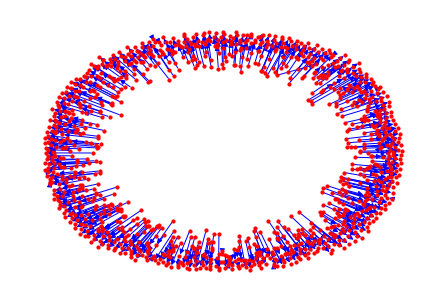

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [9]:
#Degree Centrality
# In Degree
indegree = G1.degree()
print("Maximum indegree:")
index = max(nx.in_degree_centrality(G1),key=(nx.in_degree_centrality(G1)).get)
value = indegree[index]
print("\nNode Degree")
weight = 1
for p,q in indegree:
  if q == value and weight <= 5:
    print(str(p)+"\t"+str(q))
    weight += 1
print("Degree of some nodes:")
print("\nNode    Degree")
weight = 1
for p,q in indegree:
  if weight <= 5:
    print(str(p)+"\t"+str(q))
    weight=weight+1

Maximum indegree:

Node Degree
765334	3
Degree of some nodes:

Node    Degree
535745	1
559175	1
769037	1
645599	1
470156	1


In [10]:
# Out Degree
outdegree = G1.degree()
print ("Maximum degree centrality:")
index = max(nx.out_degree_centrality(G1),key=(nx.out_degree_centrality(G1)).get)
val = outdegree[index]
print("Node Degree")
w = 1
for p,q in outdegree:
  if q == val and w <= 5:
    print(str(p)+"\t"+str(q))
    w += 1
print("\nDegree of some nodes:")
w = 1
print("\nNode   Degree")
for p,q in outdegree:
  if(w <= 5):
    print(str(p)+"\t"+str(q))
    w=w+1

Maximum degree centrality:
Node Degree
213432	2
277876	2
822327	2
156260	2
486434	2

Degree of some nodes:

Node   Degree
535745	1
559175	1
769037	1
645599	1
470156	1


In [11]:
#eigen vector centrality
eigen_cent = nx.eigenvector_centrality_numpy(G1)
maximum = max(eigen_cent.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_cent.keys():
  if (eigen_cent[node] == maximum):
    print(f'{node}\t {eigen_cent[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_cent_sorted = sorted(eigen_cent, key=eigen_cent.get, reverse=True)
w = 1
for q in eigen_cent:
  if(w <= 5):
    w = w + 1
    print (str(q)+"\t "+str(eigen_cent[q]))

Maximum eigen centrality are :
Node Eigen Vector Centrality
902604	 0.999999996629239

Eigen Vector Centrality of some nodes are:

Node 	 Eigen Vector Centrality
535745	 -1.38537445123846e-12
559175	 -2.269042437558347e-06
769037	 3.232870545157118e-12
645599	 5.29497960158945e-06
470156	 -4.1188114446233197e-13


In [12]:
#Katz centrality
katz_cent = nx.katz_centrality(G1, max_iter = 20000)
index = max(nx.katz_centrality(G1, max_iter = 20000), key = (nx.katz_centrality(G1, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 8):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1


The nodes with maximum Katz centrality are :

Node Degree
765334	0.03591006630126258

Some nodes with their Katz Centrality are:

Node Katz Centrality
535745	0.027623127924048137
559175	0.030385440716452952
769037	0.027623127924048137
645599	0.030385440716452952
470156	0.027623127924048137
894523	0.030385440716452952
392827	0.027623127924048137
846129	0.030385440716452952


In [13]:
#Page Rank
page_cent = nx.pagerank(G1, max_iter = 20000)
maximum = max(page_cent.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in page_cent.keys():
  if (page_cent[node] == maximum):
    print(f'{node}\t{page_cent[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in page_cent:
  if(w <= 8):
    print(f'{node}\t{page_cent[node]}')
    w = w + 1


Maximum Page Rank centrality are :

Node Page Rank Centrality
765334	0.0020963390995563007

Page Rank Centrality of some nodes are:

Node Page Rank Centrality
535745	0.000591178719674265
559175	0.0010928988463016103
769037	0.000591178719674265
645599	0.0010928988463016103
470156	0.000591178719674265
894523	0.0010928988463016103
392827	0.000591178719674265
846129	0.0010928988463016103


In [14]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(G1)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 5):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))

Maximum Betweeness Centrality are :

Node Betweeness Centrality
822327	7.139430216353293e-07

Betweeness Centrality of some nodes are:

Node Betweenness Centrality
535745	0.0
559175	0.0
769037	0.0
645599	0.0
470156	0.0


In [15]:
#Closeness Centrality
close_cent = nx.closeness_centrality(G1)
maximum = max(close_cent.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in close_cent:
  if (close_cent[node] == maximum):
    print(f'{node}\t{close_cent[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(close_cent, key=close_cent.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 5):
    w = w+1
    print (str(q)+"\t"+str(close_cent[q]))

Maximum Closeness Centrality:

Node Closeness Centrality
765334	0.002533783783783784

Closeness Centrality of some nodes:

Node Closeness Centrality
765334	0.002533783783783784
213432	0.0016891891891891893
277876	0.0016891891891891893
486434	0.0016891891891891893
483532	0.0016891891891891893


In [16]:
#Average local clustering coeffecient
average_local=nx.average_clustering(G2)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(G1).items():
  if(w <= 8):
    print(f'{node}\t{val}')
    w = w + 1


Clustering coeffecient of some nodes are:

Node Local Clustering Coeffecient
535745	0
559175	0
769037	0
645599	0
470156	0
894523	0
392827	0
846129	0


In [17]:
# global clustering coeffecient of nodes
global_cl=np.mean(list(nx.clustering(G2).values()))


In [18]:
#Reciprocity
reciprocity=nx.reciprocity(G2)


In [19]:
#Transitivity
transitivity=nx.transitivity(G2)


In [20]:
print("average local clustering coefficient:",average_local)
print("Global clustering coefficient:",global_cl)
print("Reciprocity:",reciprocity)
print("transitivity:",transitivity)

average local clustering coefficient: 0.3698306814797672
Global clustering coefficient: 0.3698306814797233
Reciprocity: 0.3067510355944391
transitivity: 0.449540234004255


In [21]:
#Random graph with following parameters
N = 500
average_degree = np.arange(0,5.1,0.1)
y_axis = []
for i in average_degree:
  p = i/(N-1)
  G = nx.erdos_renyi_graph(N,p,seed = 42)
  graphs = list(nx.connected_components(G))
  Ng = max(graphs, key=len)
  y_axis.append(len(Ng)/N)


In [22]:
# Finding Giant Component 
list1 = sorted(nx.strongly_connected_components(G1))
print("Number of nodes in the giant component = " + str(len(list1)) + '\n')
print("Set of nodes in the giant component:")
list1

Number of nodes in the giant component = 1185

Set of nodes in the giant component:


[{559175},
 {535745},
 {645599},
 {769037},
 {894523},
 {470156},
 {846129},
 {392827},
 {267750},
 {283930},
 {719117},
 {57518},
 {589763},
 {360532},
 {158821},
 {306216},
 {902377},
 {817637},
 {305557},
 {700105},
 {617077},
 {881703},
 {310867},
 {302856},
 {2914},
 {373561},
 {91818},
 {60672},
 {451574},
 {147475},
 {238680},
 {605588},
 {846206},
 {732320},
 {605856},
 {411742},
 {597921},
 {870780},
 {897630},
 {172730},
 {173004},
 {431210},
 {187899},
 {548319},
 {909019},
 {738117},
 {418269},
 {865187},
 {38937},
 {697603},
 {835404},
 {240460},
 {348970},
 {730768},
 {62847},
 {580057},
 {138980},
 {802240},
 {898822},
 {748663},
 {213432},
 {864284},
 {519085},
 {522273},
 {822817},
 {121318},
 {387384},
 {557718},
 {63763},
 {822405},
 {277876},
 {71247},
 {4789},
 {636497},
 {396321},
 {104188},
 {458187},
 {581119},
 {323129},
 {331271},
 {311248},
 {665626},
 {518410},
 {760644},
 {714839},
 {656415},
 {349948},
 {172776},
 {782880},
 {549193},
 {21826},
 {561490},


In [23]:
#Values <k> and Ng/N
print("<k>\t Ng/N")
for i in range(len(average_degree)):
  print ("{0:.1f}".format(average_degree[i]),'\t',y_axis[i])

<k>	 Ng/N
0.0 	 0.002
0.1 	 0.006
0.2 	 0.01
0.3 	 0.012
0.4 	 0.012
0.5 	 0.018
0.6 	 0.018
0.7 	 0.02
0.8 	 0.034
0.9 	 0.056
1.0 	 0.066
1.1 	 0.108
1.2 	 0.118
1.3 	 0.312
1.4 	 0.436
1.5 	 0.504
1.6 	 0.61
1.7 	 0.7
1.8 	 0.714
1.9 	 0.758
2.0 	 0.782
2.1 	 0.804
2.2 	 0.824
2.3 	 0.838
2.4 	 0.848
2.5 	 0.872
2.6 	 0.9
2.7 	 0.92
2.8 	 0.922
2.9 	 0.928
3.0 	 0.928
3.1 	 0.94
3.2 	 0.942
3.3 	 0.948
3.4 	 0.956
3.5 	 0.958
3.6 	 0.96
3.7 	 0.964
3.8 	 0.964
3.9 	 0.964
4.0 	 0.974
4.1 	 0.98
4.2 	 0.986
4.3 	 0.988
4.4 	 0.988
4.5 	 0.988
4.6 	 0.988
4.7 	 0.988
4.8 	 0.988
4.9 	 0.99
5.0 	 0.992


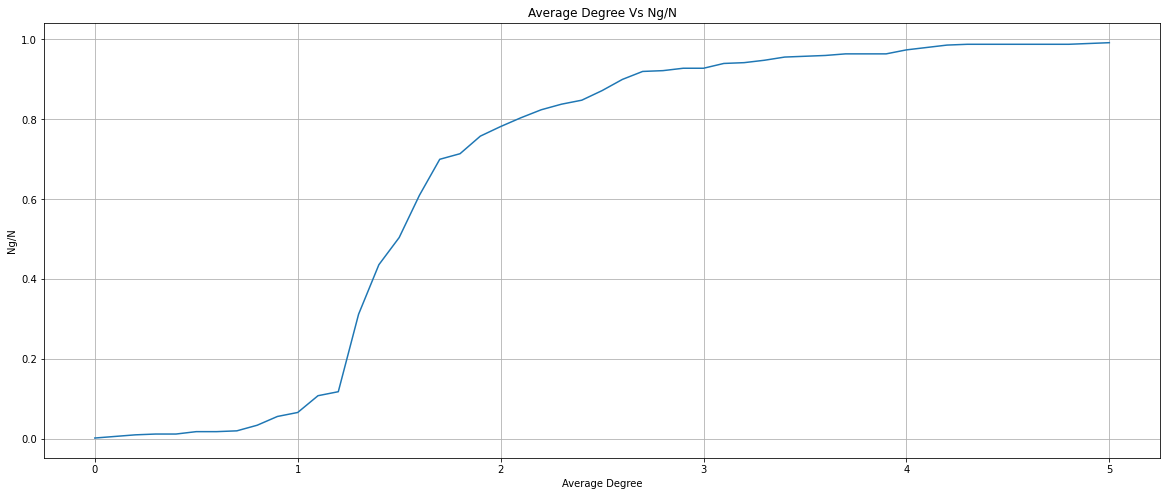

In [24]:
#Graph between <k> an Ng/N
plt.figure(figsize=(20,8))
plt.xlabel("Average Degree")
plt.ylabel("Ng/N")
plt.title("Average Degree Vs Ng/N")
plt.grid()
plt.plot(average_degree,y_axis)
plt.show()
